In [ ]:
!pip install textblob nltk vaderSentiment
nltk.download('punkt')

In [21]:
import pandas as pd
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

#device = 0 if torch.cuda.is_available() else -1
#device

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
filepath = r"combined_dfv4.csv"
df = pd.read_csv(filepath, dtype=str).sort_values(by='Survey ID')
#df
df['Combined Text'] = df['Combined Text'].astype(str)

 Text Blob/
 TextBlob Naive Bayes/
 NLTK VADER

In [19]:
def textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def textblob_naive_bayes_sentiment(text):
    blob = TextBlob(text, analyzer=NaiveBayesAnalyzer())
    return blob.sentiment.classification

def nltk_vader_sentiment(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    return vs['compound']

In [26]:
import pandas as pd

df['token_count'] = df['token_count'].astype(int)
sampled_df = df[(df['Month of Response Date'] == 'Mar-24') & (df['token_count'] < 10)].sample(n=1000, random_state=42)

sampled_df.to_excel('sampled_df[WD].xlsx', index=False)

In [13]:
#sampled_df = df.sample(n=1000, random_state=42)
#sampled_df=pd.read_csv('sentiment_analysis_output[WD].csv')
#sampled_df['Combined Text'] = sampled_df['Combined Text'].astype(str)

In [27]:
sampled_df['TextBlob_Sentiment'] = sampled_df['Combined Text'].apply(textblob_sentiment)

sampled_df['TextBlob_NaiveBayes_Sentiment'] = sampled_df['Combined Text'].apply(textblob_naive_bayes_sentiment)
#25mins for 1000 rows

sampled_df['NLTK_Vader_Sentiment'] = sampled_df['Combined Text'].apply(nltk_vader_sentiment)

In [28]:
sampled_df.to_excel('Basic_SA_Mar.xlsx', index=False)

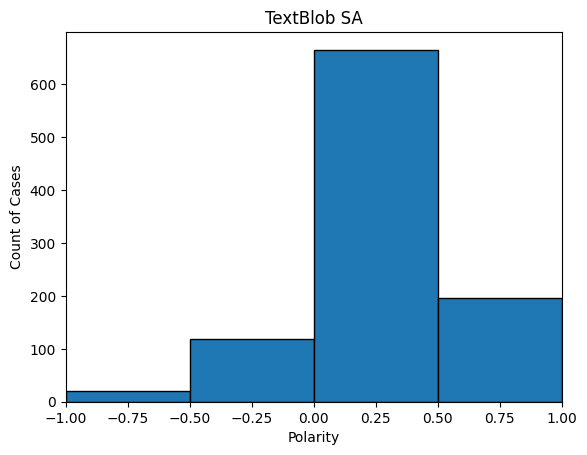

In [30]:
import matplotlib.pyplot as plt
import numpy as np  
# Define the bins
bins = [-1, -0.5, 0, 0.5, 1]

# Create the histogram
hist, bin_edges = np.histogram(sampled_df['TextBlob_Sentiment'], bins=bins)

# Plot the bar chart
plt.bar(bin_edges[:-1], hist, width=0.5, edgecolor='black', align='edge')

# Set the labels and title
plt.xlabel('Polarity')
plt.ylabel('Count of Cases')
plt.title('TextBlob SA')

# Set the x-axis limits
plt.xlim(-1, 1)

# Show the plot
plt.show()

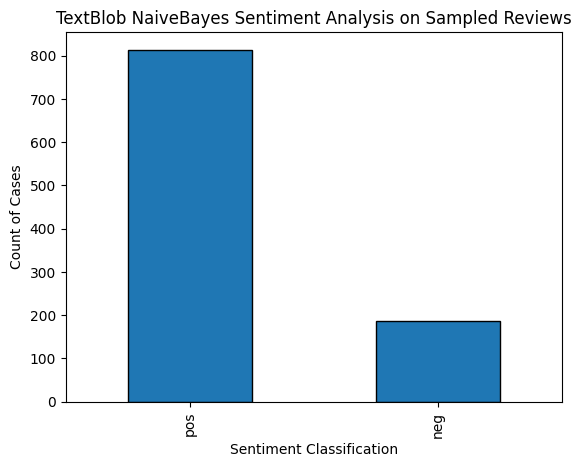

In [31]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment classification
sentiment_counts = sampled_df['TextBlob_NaiveBayes_Sentiment'].value_counts()

# Plot the bar chart
sentiment_counts.plot(kind='bar', edgecolor='black')

# Set the labels and title
plt.xlabel('Sentiment Classification')
plt.ylabel('Count of Cases')
plt.title('TextBlob NaiveBayes Sentiment Analysis on Sampled Reviews')

# Show the plot
plt.show()

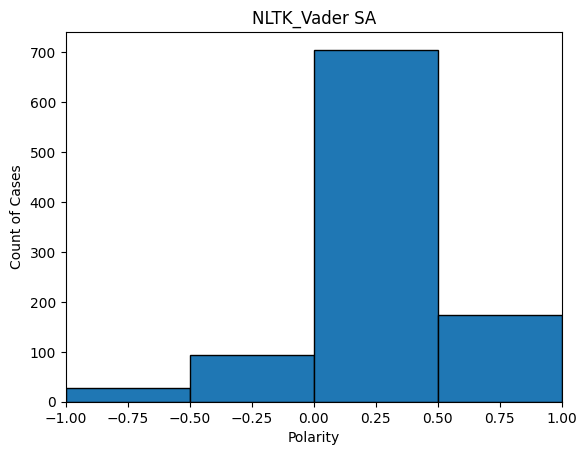

In [32]:
import matplotlib.pyplot as plt

# Define the bins
bins = [-1, -0.5, 0, 0.5, 1]

# Create the histogram
hist, bin_edges = np.histogram(sampled_df['NLTK_Vader_Sentiment'], bins=bins)

# Plot the bar chart
plt.bar(bin_edges[:-1], hist, width=0.5, edgecolor='black', align='edge')

# Set the labels and title
plt.xlabel('Polarity')
plt.ylabel('Count of Cases')
plt.title('NLTK_Vader SA')

# Set the x-axis limits
plt.xlim(-1, 1)

# Show the plot
plt.show()

Post SA Output Representation & Evaluation

In [62]:
df_annotated=pd.read_excel("sampled_df[WD].xlsx")

In [70]:
###########get df after sentiment analysis
#df_sa=pd.read_csv('sentiment_analysis_output[WD].csv')
#df_sa=pd.read_csv('SA output v2[WD].csv')
df_sa=pd.read_excel('Basic_SA_Mar.xlsx')

df_sa['Sentiment_Label_TB'] = df_sa['TextBlob_Sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)
df_sa['Sentiment_Label_TB_NB'] = df_sa['TextBlob_NaiveBayes_Sentiment'].apply(lambda x: 'Positive' if x == 'pos' else 'Negative')
df_sa['Sentiment_Label_VADER'] = df_sa['NLTK_Vader_Sentiment'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


In [71]:
print(df_annotated['True_label'].value_counts())

True_label
Positive    322
Negative    157
Neutral      17
Name: count, dtype: int64


In [72]:
df_sa['Survey ID'] = df_sa['Survey ID'].astype(str)
df_annotated['Survey ID'] = df_annotated['Survey ID'].astype(str)

#join df_sa with sampled_df[WD] using survey ID
df_sa = pd.merge(df_sa, df_annotated[['Survey ID', 'True_label']], on='Survey ID', how='inner')
df_sa

,Survey ID,Product Name,Print Customer Region,LTR,Source Type,Survey language,Review Source,Star Rating,Product Family,Supplies Family,...,Delivery,Price,Product Quality,TextBlob_Sentiment,TextBlob_NaiveBayes_Sentiment,NLTK_Vader_Sentiment,Sentiment_Label_TB,Sentiment_Label_TB_NB,Sentiment_Label_VADER,True_label
0,378873211,HP 64XL High Yield Black Original Ink Cartridge,US,10,Web Reviews,English,Amazon US,5.0,Supplies - Ink,Centaur,...,NaN,NaN,Product Quality,0.566667,pos,0.7003,Positive,Positive,Positive,Positive
1,373747514,HP 64 Tri-color Original Ink Cartridge,US,10,Web Reviews,English,Staples,5.0,Supplies - Ink,Centaur,...,NaN,NaN,NaN,0.000000,pos,-0.4215,Neutral,Positive,Negative,Positive
2,369655359,HP DeskJet 4133e All-in-One Printer,US,8,HPS Surveys,English,NaN,NaN,Supplies - Ink,Obelisk,...,NaN,NaN,NaN,0.000000,pos,0.0000,Neutral,Positive,Neutral,NaN
3,371555145,HP OfficeJet Pro 9015e All-in-One Printer,US,1,HPS Surveys,English,NaN,NaN,Supplies - Ink,Magnus,...,NaN,Price,NaN,0.000000,pos,-0.1027,Neutral,Positive,Negative,Negative
4,371438109,HP Ink Tank Wireless 415,US,10,HPS Surveys,English,NaN,NaN,Supplies - Ink,Kronos Refresh,...,NaN,NaN,NaN,0.000000,neg,0.4939,Neutral,Negative,Positive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,371913371,HP ENVY 5055 All-in-One Printer,US,10,HPS Surveys,English,NaN,NaN,Supplies - Ink,Dolmen Refresh,...,NaN,Price,NaN,1.000000,pos,0.5719,Positive,Positive,Positive,NaN
996,367931403,HP OfficeJet Pro 9015e All-in-One Printer,US,8,HPS Surveys,English,NaN,NaN,Supplies - Ink,Magnus,...,NaN,NaN,NaN,0.000000,neg,-0.3506,Neutral,Negative,Negative,NaN
997,378872036,HP 65 2-pack Black/Tri-color Original Ink Cart...,US,10,Web Reviews,English,Amazon US,5.0,Supplies - Ink,Dolmen Refresh,...,Delivery,NaN,NaN,0.450000,pos,0.4404,Positive,Positive,Positive,NaN
998,368977300,HP 67XL High Yield Black/67 Tri-color 2-pack O...,US,10,Web Reviews,English,Office Depot,5.0,Supplies - Ink,Obelisk,...,NaN,NaN,NaN,0.800000,neg,0.6249,Positive,Negative,Positive,NaN


Comparing SA output with True label (From LTR/star rating score)

In [ ]:
#redefine the "true label" - adjust threshold
def score_to_sentiment(row):
    if not pd.isna(row['LTR']):
        # Use LTR (0-10)
        if row['LTR'] <= 6:
            return 'Negative'
        else:
            return 'Positive'
    elif not pd.isna(row['Star Rating']):
        # Use Star_Rating (1-5)
        if row['Star_Rating'] <= 3:
            return 'Negative'
        else:
            return 'Positive'
    else:
        return 'Unknown'  
    
df_sa['True_label'] = df_sa.apply(score_to_sentiment, axis=1)


#print(df_sa[['LTR', 'Star Rating', 'True_label']].sample(20))
#print random enties to validate the labels


In [16]:
textblob_accuracy = accuracy_score(df_sa['True_Label'], df_sa['Sentiment_Label_TB'])
print("TextBlob Accuracy:", textblob_accuracy)

textblobnb_accuracy = accuracy_score(df_sa['True_Label'], df_sa['Sentiment_Label_TB_NB'])
print("TextBlob NB Accuracy:", textblobnb_accuracy)

vader_accuracy = accuracy_score(df_sa['True_Label'], df_sa['Sentiment_Label_VADER'])
print("VADER Accuracy:", vader_accuracy)

#past
#textblob_accuracy = 0.504
#textblobnb_accuracy = 0.56
#vader_accuracy = 0.596


TextBlob Accuracy: 0.625
TextBlob NB Accuracy: 0.662
VADER Accuracy: 0.605


C:\Users\Admin\AppData\Local\Temp\ipykernel_38592\2216064109.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_38592\2216064109.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col

  True_Label  TextBlob  TextBlob_NB     VADER
0   Negative  0.488235     0.235294  0.588235
1   Positive  0.695455     0.881818  0.613636


NameError: name 'plt' is not defined

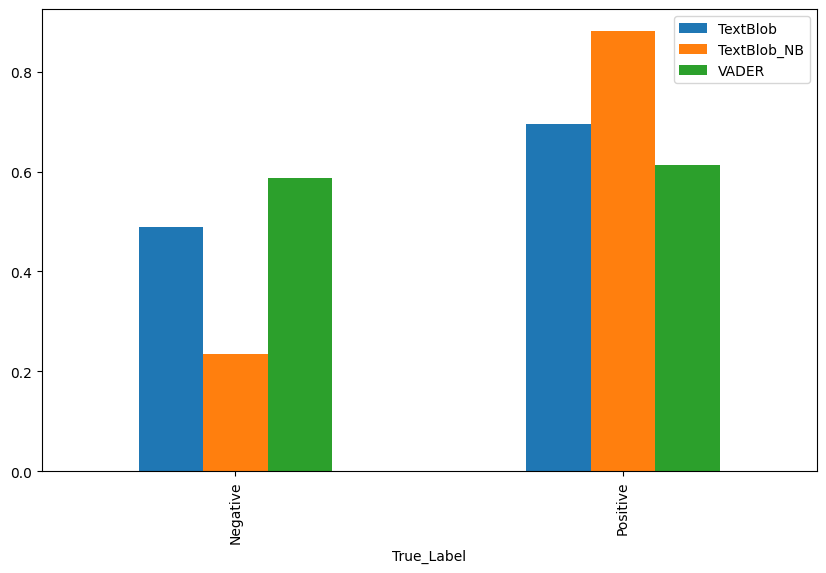

In [17]:
def calculate_accuracy_per_label(df, model_col, true_label_col):
    accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
    return accuracy_per_label

textblob_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB', 'True_Label')
textblob_nb_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB_NB', 'True_Label')
vader_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_VADER', 'True_Label')

accuracy_df = pd.DataFrame({
    'TextBlob': textblob_accuracy_per_label,
    'TextBlob_NB': textblob_nb_accuracy_per_label,
    'VADER': vader_accuracy_per_label
}).reset_index()

print(accuracy_df)


accuracy_df.plot(x='True_Label', kind='bar', figsize=(10, 6))
plt.title('SA Model Accuracy by True Label')
plt.xlabel('True Label')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()


Comparing with True_label (Manually annotated @500 samples)

In [85]:
df_sa['True_label'] = df_sa['True_label'].astype(str)
#filter those with True_label = 'Positive' or 'Negativel, no null value (annotated)
df_sa = df_sa[(df_sa['True_label'] == 'Positive') | (df_sa['True_label'] == 'Negative')]
df_sa['Sentiment_Label_TB'] = df_sa['Sentiment_Label_TB'].astype(str)
df_sa['Sentiment_Label_TB_NB'] = df_sa['Sentiment_Label_TB_NB'].astype(str)
df_sa['Sentiment_Label_VADER'] = df_sa['Sentiment_Label_VADER'].astype(str)

textblob_accuracy = accuracy_score(df_sa['True_label'], df_sa['Sentiment_Label_TB'])
print("TextBlob Accuracy:", textblob_accuracy)

textblobnb_accuracy = accuracy_score(df_sa['True_label'], df_sa['Sentiment_Label_TB_NB'])
print("TextBlob NB Accuracy:", textblobnb_accuracy)

vader_accuracy = accuracy_score(df_sa['True_label'], df_sa['Sentiment_Label_VADER'])
print("VADER Accuracy:", vader_accuracy)

TextBlob Accuracy: 0.5678496868475992
TextBlob NB Accuracy: 0.5866388308977035
VADER Accuracy: 0.5386221294363257


  True_label  TextBlob  TextBlob_NB     VADER
0   Negative   0.33121     0.229299  0.318471
1   Positive   0.68323     0.760870  0.645963


C:\Users\Admin\AppData\Local\Temp\ipykernel_40856\2763734256.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
C:\Users\Admin\AppData\Local\Temp\ipykernel_40856\2763734256.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col

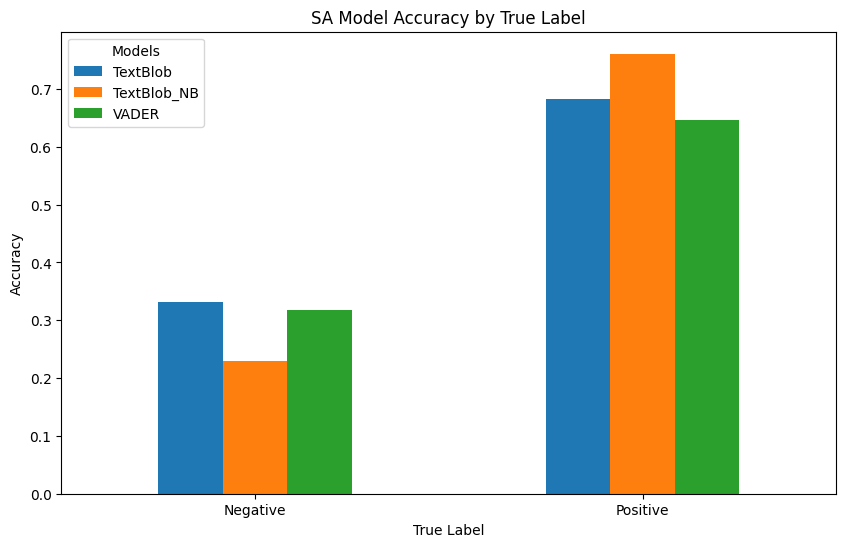

In [88]:
def calculate_accuracy_per_label(df, model_col, true_label_col):
    accuracy_per_label = df.groupby(true_label_col).apply(lambda x: (x[model_col] == x[true_label_col]).mean())
    return accuracy_per_label

textblob_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB', 'True_label')
textblob_nb_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_TB_NB', 'True_label')
vader_accuracy_per_label = calculate_accuracy_per_label(df_sa, 'Sentiment_Label_VADER', 'True_label')

accuracy_df = pd.DataFrame({
    'TextBlob': textblob_accuracy_per_label,
    'TextBlob_NB': textblob_nb_accuracy_per_label,
    'VADER': vader_accuracy_per_label
}).reset_index()

print(accuracy_df)


accuracy_df.plot(x='True_label', kind='bar', figsize=(10, 6))
plt.title('SA Model Accuracy by True Label')
plt.xlabel('True Label')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Models')
plt.show()


Train NB using True_Label (manually annotated)

Naive Bayes accuracy: 0.8854166666666666
Naive Bayes classification report:
              precision    recall  f1-score   support

    Negative       0.81      0.83      0.82        30
    Positive       0.92      0.91      0.92        66

    accuracy                           0.89        96
   macro avg       0.86      0.87      0.87        96
weighted avg       0.89      0.89      0.89        96



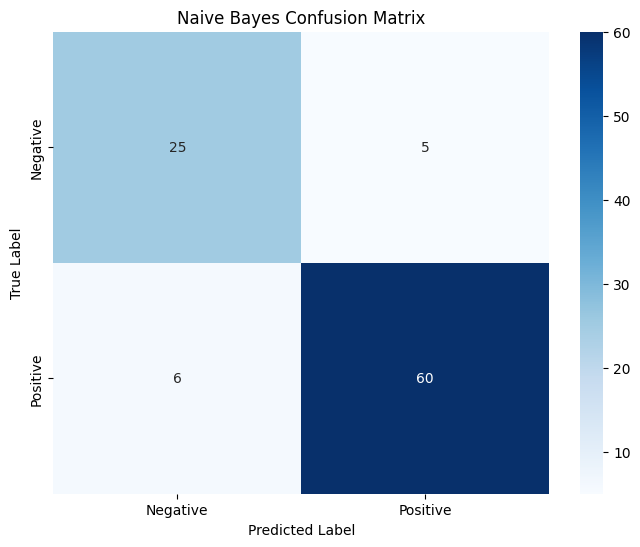

In [115]:
# Prepare data for Naive Bayes
X = df_sa['Combined Text']
y = df_sa['True_label']

# Split dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Prepare data for Naive Bayes
X = df_sa['Combined Text']
y = df_sa['True_label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to a numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)  # Fit and transform on training data
X_test_vectorized = vectorizer.transform(X_test)        # Transform on test data

# Train the Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = nb_model.predict(X_test_vectorized)

# Add the predicted labels back to the original df_sa DataFrame
df_sa.loc[X_test.index, 'Predicted_Label_NB'] = y_pred
# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vectorized, y_train)

y_pred = nb.predict(X_test_vectorized)
print("Naive Bayes accuracy:", accuracy_score(y_test, y_pred))
print("Naive Bayes classification report:")
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [78]:
# Vectorize the entire dataset
X_full_vectorized = vectorizer.transform(df_sa['Combined Text'])  # Use the same vectorizer

# Make predictions for the entire dataset
df_sa['Predicted_Label_NB'] = nb.predict(X_full_vectorized)


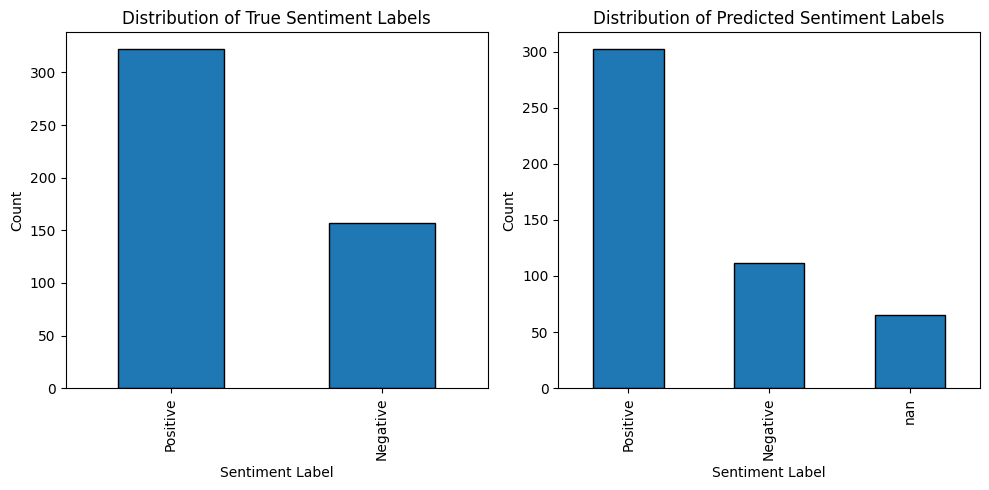

In [106]:
import matplotlib.pyplot as plt

# Step 1: Count the occurrences of each sentiment label in the True_Label and Predicted_Label_NB columns
true_label_counts = df_sa['True_label'].value_counts()
predicted_label_counts = df_sa['Predicted_Label_NB'].value_counts()

# Step 2: Plot the distribution using a bar chart

# Plot the distribution of True Labels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
true_label_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of True Sentiment Labels')

# Plot the distribution of Predicted Labels
plt.subplot(1, 2, 2)
predicted_label_counts.plot(kind='bar', edgecolor='black')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Distribution of Predicted Sentiment Labels')

# Show the plots
plt.tight_layout()
plt.show()

In [107]:
textblobnb_accuracy_afterTrain = accuracy_score(df_sa['True_label'], df_sa['Predicted_Label_NB'])
print("NB Accuracy:", textblobnb_accuracy_afterTrain)

NB Accuracy: 0.824634655532359


In [82]:
textblobnb_accuracy_afterTrain = accuracy_score(df_sa['True_label'], df_sa['Predicted_Label_NB'])
print("TextBlob NB New Accuracy:", textblobnb_accuracy_afterTrain)
#past 0.805

TextBlob NB New Accuracy: 0.848


In [53]:
df_sa.to_csv('SA_review_predicted_output.csv', index=False)

SVM


SVM Model Accuracy: 0.90
              precision    recall  f1-score   support

    Negative       0.81      0.87      0.84        30
    Positive       0.94      0.91      0.92        66
     Neutral       0.00      0.00      0.00         0

    accuracy                           0.90        96
   macro avg       0.58      0.59      0.59        96
weighted avg       0.90      0.90      0.90        96



d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWa

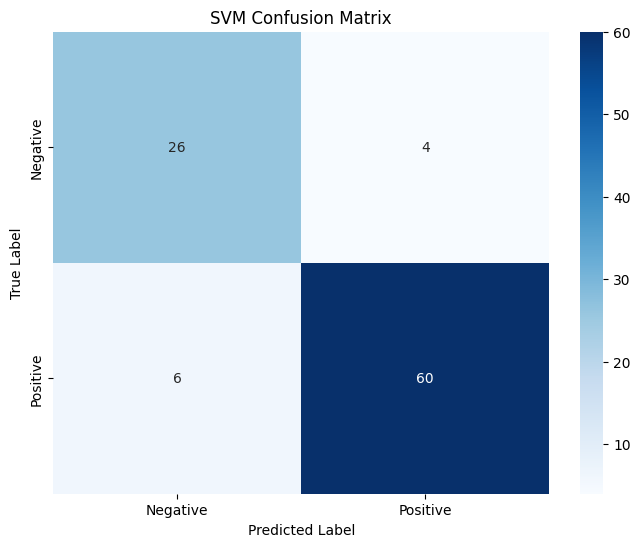

In [103]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Define a TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the text data to numerical features
X = tfidf.fit_transform(df_sa['Combined Text']).toarray()

# Target labels: Encode sentiment labels as numerical values
df_sa['Sentiment_Label_Numeric'] = df_sa['True_label'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})
y = df_sa['Sentiment_Label_Numeric']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Support Vector Classifier (SVC) with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train, y_train)
# Predict sentiment on the test set
y_pred = svm_model.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred, labels=[0, 1, 2], target_names=['Negative', 'Positive', 'Neutral']))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Negative', 'Positive'], columns=['Negative', 'Positive'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

SVM Model Accuracy: 0.68
              precision    recall  f1-score   support

    Negative       0.62      0.73      0.67        59
    Positive       0.73      0.89      0.80       105
     Neutral       0.00      0.00      0.00        36

    accuracy                           0.68       200
   macro avg       0.45      0.54      0.49       200
weighted avg       0.57      0.68      0.62       200



SA Model test on NLI output

In [119]:
nli_data_roberta=pd.read_csv(r'D:\InkSightAnalyzer\Multi-Turn Zero-Shot ABSA\Mar-24\nli3_roberta_df_results.csv')
nli_data_msBert=pd.read_csv(r'D:\InkSightAnalyzer\Multi-Turn Zero-Shot ABSA\Mar-24\nli2_msoftbert_df_results.csv')
nli_data_fbbart=pd.read_csv(r'D:\InkSightAnalyzer\Multi-Turn Zero-Shot ABSA\Mar-24\nli1_fbbart_df_results.csv')

nli_data_fbbart['polarity'] = nli_data_fbbart['polarity'].str.capitalize()
nli_data_msBert['polarity'] = nli_data_msBert['polarity'].str.capitalize()
nli_data_roberta['polarity'] = nli_data_roberta['polarity'].str.capitalize()

In [138]:
df = nli_data_roberta[['sentence', 'polarity']]
df1 = nli_data_msBert[['sentence', 'polarity']]
df2 = nli_data_fbbart[['sentence', 'polarity']]

# Vectorize the sentences (use the same vectorizer as during training)
X_nli_nb = vectorizer.transform(df['sentence'])  # Use the Naive Bayes vectorizer
X_nli_svm = tfidf.transform(df['sentence'])  # Use the SVM vectorizer

#df1
X_nli_nb1 = vectorizer.transform(df1['sentence'])  # Use the Naive Bayes vectorizer
X_nli_svm1 = tfidf.transform(df1['sentence'])  # Use the SVM vectorizer

#df2
X_nli_nb2 = vectorizer.transform(df2['sentence'])  # Use the Naive Bayes vectorizer
X_nli_svm2 = tfidf.transform(df2['sentence'])  # Use the SVM vectorizer

# Make predictions using the SVM and Naive Bayes models
df['SVM_Predicted'] = svm_model.predict(X_nli_svm.toarray())
df['NB_Predicted'] = nb_model.predict(X_nli_nb)

df1['SVM_Predicted'] = svm_model.predict(X_nli_svm1.toarray())
df1['NB_Predicted'] = nb_model.predict(X_nli_nb1)

df2['SVM_Predicted'] = svm_model.predict(X_nli_svm2.toarray())
df2['NB_Predicted'] = nb_model.predict(X_nli_nb2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_40856\1450516098.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SVM_Predicted'] = svm_model.predict(X_nli_svm.toarray())
C:\Users\Admin\AppData\Local\Temp\ipykernel_40856\1450516098.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NB_Predicted'] = nb_model.predict(X_nli_nb)
C:\Users\Admin\AppData\Local\Temp\ipykernel_40856\1450516098.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [139]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming the following mapping based on your initial mapping of labels
label_mapping = {0: 'Negative', 1: 'Positive', 2: 'Neutral'}

# Create new columns for mapped predictions
df['SVM_Predicted'] = df['SVM_Predicted'].map(label_mapping)
df1['SVM_Predicted'] = df1['SVM_Predicted'].map(label_mapping)
df2['SVM_Predicted'] = df2['SVM_Predicted'].map(label_mapping)

C:\Users\Admin\AppData\Local\Temp\ipykernel_40856\2849324010.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SVM_Predicted'] = df['SVM_Predicted'].map(label_mapping)
C:\Users\Admin\AppData\Local\Temp\ipykernel_40856\2849324010.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['SVM_Predicted'] = df1['SVM_Predicted'].map(label_mapping)
C:\Users\Admin\AppData\Local\Temp\ipykernel_40856\2849324010.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [144]:
# Calculate discrepancy between SVM and polarity Label (from NLI)
svm_accuracy = accuracy_score(df['polarity'], df['SVM_Predicted'])
print(f"SVM Model Accuracy for roberta: {svm_accuracy}")
nb_accuracy = accuracy_score(df['polarity'], df['NB_Predicted'])
print(f"Naive Bayes Model Accuracy roberta: {nb_accuracy}")

print("-------------------------------------------------")
#msbert
svm_accuracy_msbert = accuracy_score(df1['polarity'], df1['SVM_Predicted'])
print(f"SVM Model Accuracy for msbert: {svm_accuracy_msbert}")
nb_accuracy_ms = accuracy_score(df1['polarity'], df1['NB_Predicted'])
print(f"Naive Bayes Model Accuracy msbert: {nb_accuracy_ms}")

print("-------------------------------------------------")
#fbart

svm_accuracy_fb = accuracy_score(df2['polarity'], df2['SVM_Predicted'])
print(f"SVM Model Accuracy for fbbart: {svm_accuracy_fb}")
nb_accuracy_fb = accuracy_score(df2['polarity'], df2['NB_Predicted'])
print(f"Naive Bayes Model Accuracy fbbart: {nb_accuracy_fb}")


SVM Model Accuracy for roberta: 0.7166030534351145
Naive Bayes Model Accuracy roberta: 0.7154103053435115
-------------------------------------------------
SVM Model Accuracy for msbert: 0.6934432515337423
Naive Bayes Model Accuracy msbert: 0.7005368098159509
-------------------------------------------------
SVM Model Accuracy for fbbart: 0.7034013605442176
Naive Bayes Model Accuracy fbbart: 0.7022108843537415


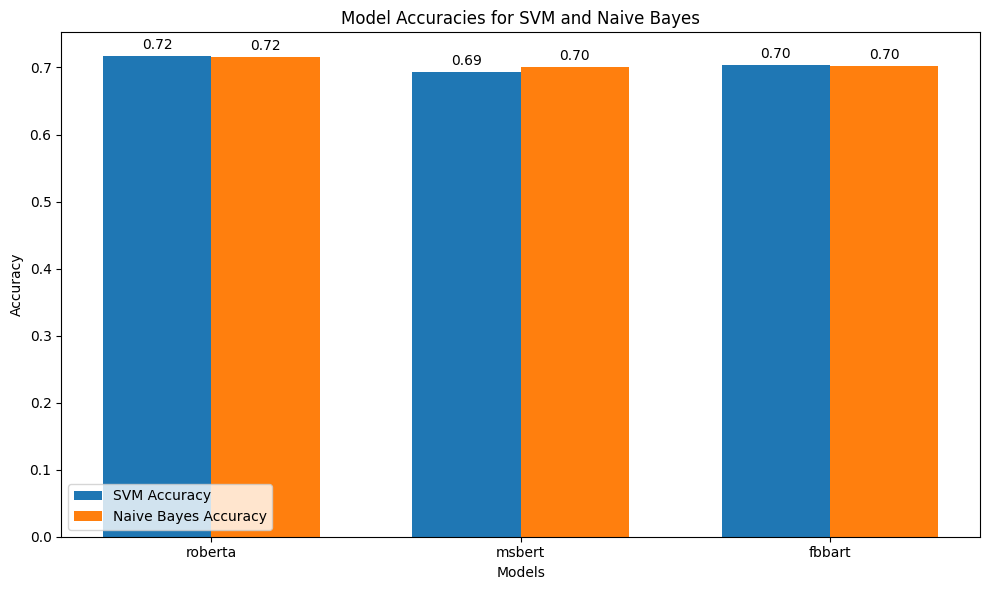

In [145]:
import matplotlib.pyplot as plt

# Data preparation
models = ['roberta', 'msbert', 'fbbart']
svm_accuracies = [0.7166030534351145, 0.6934432515337423, 0.7034013605442176]
nb_accuracies = [0.7154103053435115, 0.7005368098159509, 0.7022108843537415]

# Plotting
x = range(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.35

# Plot bars
rects1 = ax.bar(x, svm_accuracies, width, label='SVM Accuracy')
rects2 = ax.bar([p + width for p in x], nb_accuracies, width, label='Naive Bayes Accuracy')

# Add some text for labels, title and axes ticks
ax.set_xlabel('Models')
ax.set_ylabel('Matching Accuracy')
ax.set_title('Model comparisons for SVM and Naive Bayes')
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(models)
ax.legend()

# Function to add labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add labels
add_labels(rects1)
add_labels(rects2)

# Show plot
plt.tight_layout()
plt.show()

BACKUPS

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_svm_model = grid_search.best_estimator_

# Evaluate the best model
best_pred = best_svm_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)
print(f"Best SVM Model Accuracy: {best_accuracy:.2f}")


Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best SVM Model Accuracy: 0.69


In [36]:
# Transform the 'text' column of df_sa into TF-IDF features
X_sa = tfidf.transform(sampled_df['Combined Text']).toarray()

# Predict the sentiment labels using the trained SVM model
sampled_df['SVM_Predicted'] = svm_model.predict(X_sa)

# Map the numeric predictions back to sentiment labels ('Positive', 'Negative', 'Neutral')
sampled_df['SVM_Predicted_Label'] = sampled_df['SVM_Predicted'].map({1: 'Positive', 0: 'Negative', 2: 'Neutral'})

# Display the first few predictions
print(sampled_df[['Combined Text', 'SVM_Predicted_Label']].head())


                                           Combined Text SVM_Predicted_Label
25588  Because I have some difficulties to use it and...            Negative
30810  Bought a few weeks ago. Easy to install. Excel...            Positive
61411          Only recommend original HP ink! Best ink!            Positive
49186  IT was fine until it wasn't. The copies were g...            Positive
42104  The HP Ink service has charged me on 2 differe...            Negative


In [37]:
SVM_accuracy_afterTrain_onothersample = accuracy_score(sampled_df['True_Label'], sampled_df['SVM_Predicted_Label'])
print("SVM Overall Accuracy:", SVM_accuracy_afterTrain_onothersample)

SVM Overall Accuracy: 0.656


In [38]:
sampled_df.to_csv('SA_Random_Samples.csv', index=False)

Overall Compare for ML methods

In [43]:
from sklearn.metrics import classification_report

# Classification report for SVM
print("SVM Classification Report:")
svm_report = classification_report(sampled_df['True_Label'], sampled_df['SVM_Predicted_Label'], target_names=['Negative', 'Neutral', 'Positive'])
print(svm_report)

# Classification report for Naive Bayes
print("Naive Bayes Classification Report:")
nb_report = classification_report(sampled_df['True_Label'], sampled_df['Predicted_Label_NB'], target_names=['Negative', 'Neutral', 'Positive'])
print(nb_report)

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.57      0.60      0.58       288
     Neutral       0.18      0.03      0.05       148
    Positive       0.71      0.85      0.78       564

    accuracy                           0.66      1000
   macro avg       0.49      0.49      0.47      1000
weighted avg       0.59      0.66      0.61      1000

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.60      0.60      0.60       288
     Neutral       0.12      0.03      0.04       148
    Positive       0.71      0.86      0.78       564

    accuracy                           0.66      1000
   macro avg       0.48      0.50      0.47      1000
weighted avg       0.59      0.66      0.62      1000



In [46]:
# Extract classification report as a dictionary
svm_report_dict = classification_report(sampled_df['True_Label'], sampled_df['SVM_Predicted_Label'], target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)
nb_report_dict = classification_report(sampled_df['True_Label'], sampled_df['Predicted_Label_NB'], target_names=['Negative', 'Neutral', 'Positive'], output_dict=True)


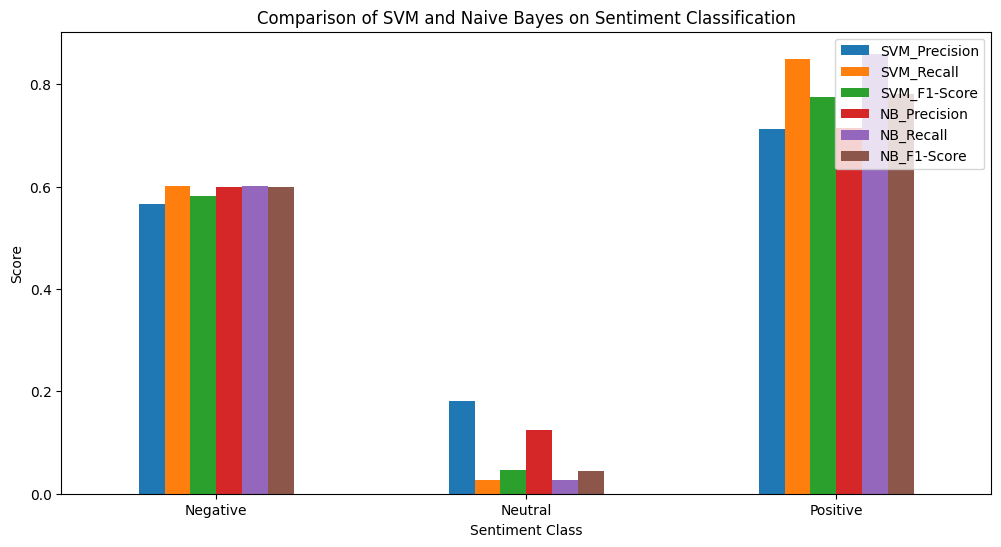

In [48]:
import pandas as pd

# Create a DataFrame for comparison
metrics_df = pd.DataFrame({
    'SVM_Precision': [svm_report_dict['Negative']['precision'], svm_report_dict['Neutral']['precision'], svm_report_dict['Positive']['precision']],
    'SVM_Recall': [svm_report_dict['Negative']['recall'], svm_report_dict['Neutral']['recall'], svm_report_dict['Positive']['recall']],
    'SVM_F1-Score': [svm_report_dict['Negative']['f1-score'], svm_report_dict['Neutral']['f1-score'], svm_report_dict['Positive']['f1-score']],
    'NB_Precision': [nb_report_dict['Negative']['precision'], nb_report_dict['Neutral']['precision'], nb_report_dict['Positive']['precision']],
    'NB_Recall': [nb_report_dict['Negative']['recall'], nb_report_dict['Neutral']['recall'], nb_report_dict['Positive']['recall']],
    'NB_F1-Score': [nb_report_dict['Negative']['f1-score'], nb_report_dict['Neutral']['f1-score'], nb_report_dict['Positive']['f1-score']]
}, index=['Negative', 'Neutral', 'Positive'])

import matplotlib.pyplot as plt

# Plot the comparison of Precision, Recall, and F1-Score
metrics_df.plot(kind='bar', figsize=(12, 6))

# Add title and labels
plt.title('Comparison of SVM and Naive Bayes on Sentiment Classification')
plt.ylabel('Score')
plt.xlabel('Sentiment Class')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()



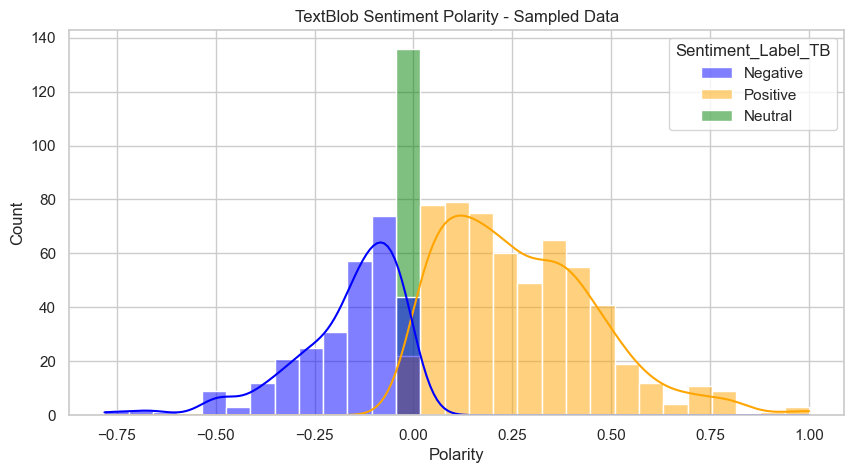

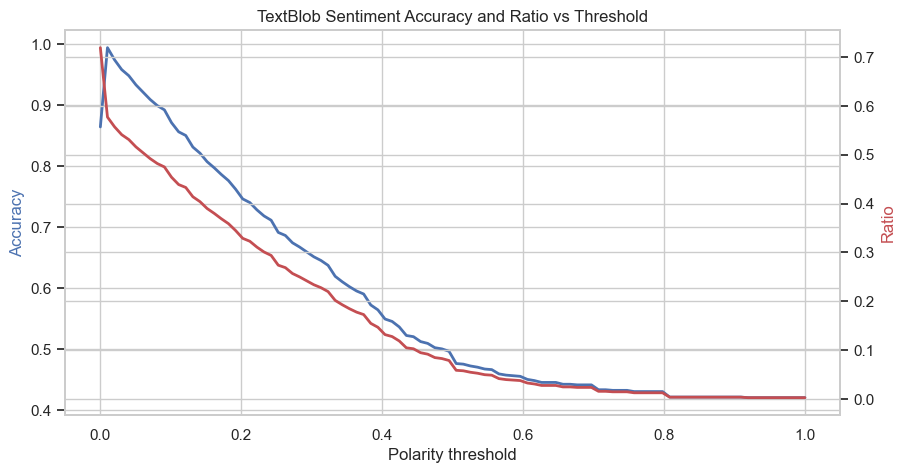

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution
plt.figure(figsize=(10, 5))

# Histogram of sentiment polarity
sns.histplot(data=df_sa, x='TextBlob_Sentiment', hue='Sentiment_Label_TB', kde=True, palette={"Positive": "orange", "Negative": "blue","Neutral":"green"})

plt.title("TextBlob Sentiment Polarity - Sampled Data")
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.show()


# Generate accuracy and ratio based on thresholds
thresholds = np.linspace(0, 1, 100)
accuracy = []
neg_pos_ratio = []

for threshold in thresholds:
    predicted_pos = df_sa['TextBlob_Sentiment'] >= threshold
    actual_pos = df_sa['Sentiment_Label_TB'] == 'Positive'
    
    acc = (predicted_pos == actual_pos).mean()
    ratio = predicted_pos.mean()
    
    accuracy.append(acc)
    neg_pos_ratio.append(ratio)

# Plot the accuracy and ratio
fig, ax1 = plt.subplots(figsize=(10, 5))

# Accuracy plot
ax1.plot(thresholds, accuracy, 'b-', label='Accuracy (neg/pos)', linewidth=2)
ax1.set_xlabel('Polarity threshold')
ax1.set_ylabel('Accuracy', color='b')

# Share x-axis for ratio
ax2 = ax1.twinx()
ax2.plot(thresholds, neg_pos_ratio, 'r-', label='Ratio (neg/pos vs all)', linewidth=2)
ax2.set_ylabel('Ratio', color='r')

plt.title('TextBlob Sentiment Accuracy and Ratio vs Threshold')
plt.show()
